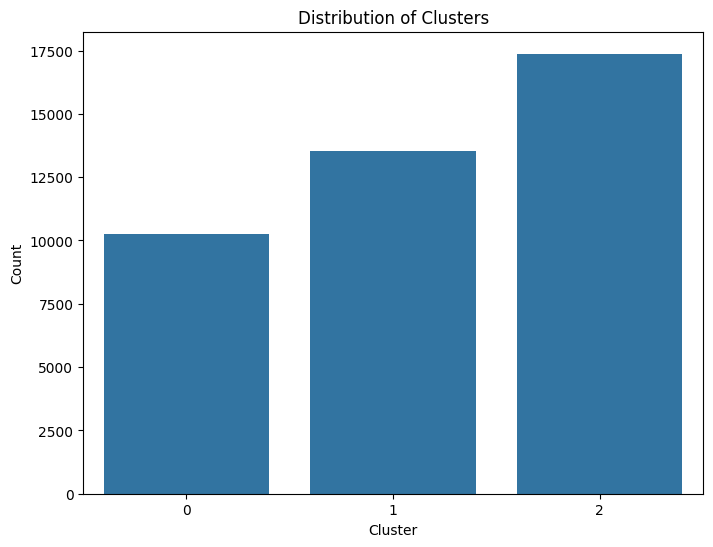

Processing Cluster 2...
Cluster 2 Classification Metrics: {'accuracy': 0.9482014388489208, 'f1_score': 0.5227609822196994, 'confusion_matrix': array([[3288,   22],
       [ 158,    7]])}
Processing Cluster 0...
Cluster 0 Classification Metrics: {'accuracy': 0.936222005842259, 'f1_score': 0.4910408095710976, 'confusion_matrix': array([[1922,   15],
       [ 116,    1]])}
Processing Cluster 1...
Cluster 1 Classification Metrics: {'accuracy': 0.7793357933579336, 'f1_score': 0.6652645859358992, 'confusion_matrix': array([[1847,  179],
       [ 419,  265]])}
   Cluster            Type  accuracy  f1_score           confusion_matrix
0        2  Classification  0.948201  0.522761     [[3288, 22], [158, 7]]
1        0  Classification  0.936222  0.491041     [[1922, 15], [116, 1]]
2        1  Classification  0.779336  0.665265  [[1847, 179], [419, 265]]


In [5]:
from load_and_clean_data import load_and_clean_data
from perform_kmeans_clustering import perform_kmeans_clustering
from visualize_clusters import visualize_clusters
from split_train_test_by_cluster import split_train_test_by_cluster
from classify_with_random_forest import classify_with_random_forest
from regress_with_random_forest import regress_with_random_forest
import pandas as pd

# Load the dataset
file_path = 'bank-direct-marketing-campaigns (1).csv'
data = load_and_clean_data(file_path)

# Separate features and target variables
classification_target = 'y_yes' if 'y_yes' in data.columns else 'y'
X = data.drop([classification_target], axis=1)
y_class = data[classification_target]
y_reg = data['duration'] if 'duration' in data.columns else None

# Perform clustering
data, X_scaled = perform_kmeans_clustering(data, X)
visualize_clusters(data)

# Process each cluster
results = []
for cluster in data['cluster'].unique():
    print(f"Processing Cluster {cluster}...")
    X_train, X_test, y_class_train, y_class_test = split_train_test_by_cluster(data, X_scaled, y_class, cluster)

    # Classification
    class_metrics = classify_with_random_forest(X_train, X_test, y_class_train, y_class_test)
    print(f"Cluster {cluster} Classification Metrics: {class_metrics}")
    results.append({"Cluster": cluster, "Type": "Classification", **class_metrics})

    # Regression if available
    if y_reg is not None:
        y_reg_train, y_reg_test = split_train_test_by_cluster(data, X_scaled, y_reg, cluster)
        reg_metrics = regress_with_random_forest(X_train, X_test, y_reg_train, y_reg_test)
        print(f"Cluster {cluster} Regression Metrics: {reg_metrics}")
        results.append({"Cluster": cluster, "Type": "Regression", **reg_metrics})

# Display results
results_df = pd.DataFrame(results)
print(results_df)
